In [32]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
# Import specific models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


In [5]:
#Load the necsssary csv files

df_opel_corsa_01 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\opel_corsa_01.csv', delimiter=';', decimal=',')
df_opel_corsa_02 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\opel_corsa_02.csv', delimiter=';', decimal=',')
df_peugeot_207_01 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\peugeot_207_01.csv', delimiter=';', decimal=',')
df_peugeot_207_02 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\peugeot_207_02.csv', delimiter=';', decimal=',')


In [9]:
#Data Processing 

# Example: Combine datasets
df_combined = pd.concat([df_opel_corsa_01, df_opel_corsa_02, df_peugeot_207_01, df_peugeot_207_02], ignore_index=True)

# Convert data types
numeric_cols = [
    'AltitudeVariation', 
    'VehicleSpeedInstantaneous', 
    'VehicleSpeedAverage', 
    'VehicleSpeedVariance',
    'VehicleSpeedVariation', 
    'LongitudinalAcceleration', 
    'EngineLoad', 
    'MassAirFlow', 
    'VerticalAcceleration', 
    'FuelConsumptionAverage'
] # List all numeric columns
df_combined[numeric_cols] = df_combined[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Encode categorical variables
le = LabelEncoder()
df_combined['drivingStyle'] = le.fit_transform(df_combined['drivingStyle'])


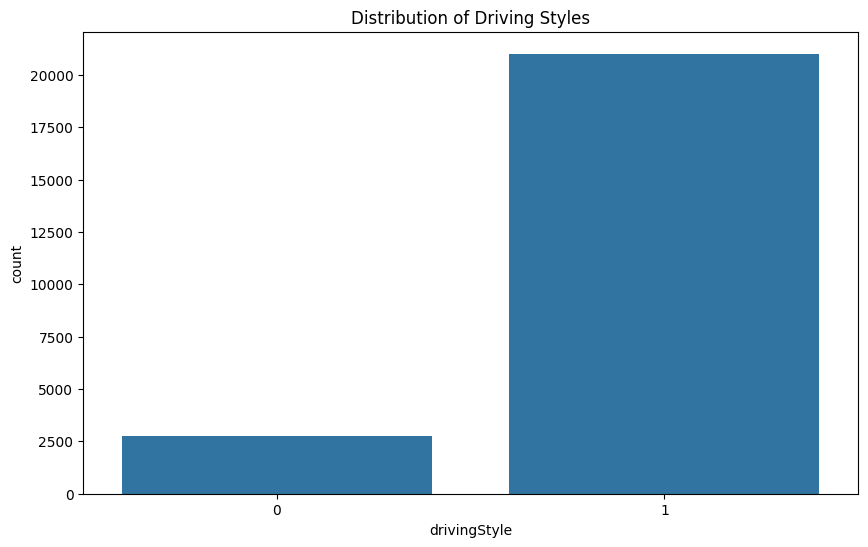

In [10]:
#Perform Exploratory Data Analysis to under distribution of variables, relationships between features and prepare visiualizations

plt.figure(figsize=(10, 6))
sns.countplot(x='drivingStyle', data=df_combined)
plt.title('Distribution of Driving Styles')
plt.show()


In [11]:
#Splitting the dataset 

X = df_combined.drop('drivingStyle', axis=1) # Features
y = df_combined['drivingStyle'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#Data Scaling

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assuming 'roadSurface', 'traffic', 'drivingStyle' are categorical features
# First, separate features and target variable if not already done
X = df_combined.drop(['drivingStyle'], axis=1)  # Include all other features except the target
y = df_combined['drivingStyle']

# Encode categorical features as a one-hot numeric array
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[['roadSurface', 'traffic']]).toarray())
X_encoded.index = X.index

# Giving new columns appropriate names
encoded_columns = encoder.get_feature_names_out(['roadSurface', 'traffic'])
X_encoded.columns = encoded_columns

# Drop original categorical columns and concatenate encoded ones
X = X.drop(['roadSurface', 'traffic'], axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all column names in X_train and X_test to strings to ensure consistency
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [20]:
#Model Training 

from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

model = LogisticRegression()
model.fit(X_train_imputed, y_train)

LogisticRegression()

In [22]:
#Model Evalutation 

predictions = model.predict(X_test_imputed)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.48      0.05      0.10       538
           1       0.89      0.99      0.94      4217

    accuracy                           0.89      4755
   macro avg       0.68      0.52      0.52      4755
weighted avg       0.84      0.89      0.84      4755



In [30]:
# Train an SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')  
svm_model.fit(X_train_imputed, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test_imputed)
print(classification_report(y_test, svm_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.23      0.79      0.36       538
           1       0.96      0.67      0.79      4217

    accuracy                           0.68      4755
   macro avg       0.60      0.73      0.57      4755
weighted avg       0.88      0.68      0.74      4755



In [25]:
# Train a kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of 'n_neighbors'
knn_model.fit(X_train_imputed, y_train)

# Evaluate the kNN model
knn_predictions = knn_model.predict(X_test_imputed)
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.72      0.53      0.61       538
           1       0.94      0.97      0.96      4217

    accuracy                           0.92      4755
   macro avg       0.83      0.75      0.79      4755
weighted avg       0.92      0.92      0.92      4755



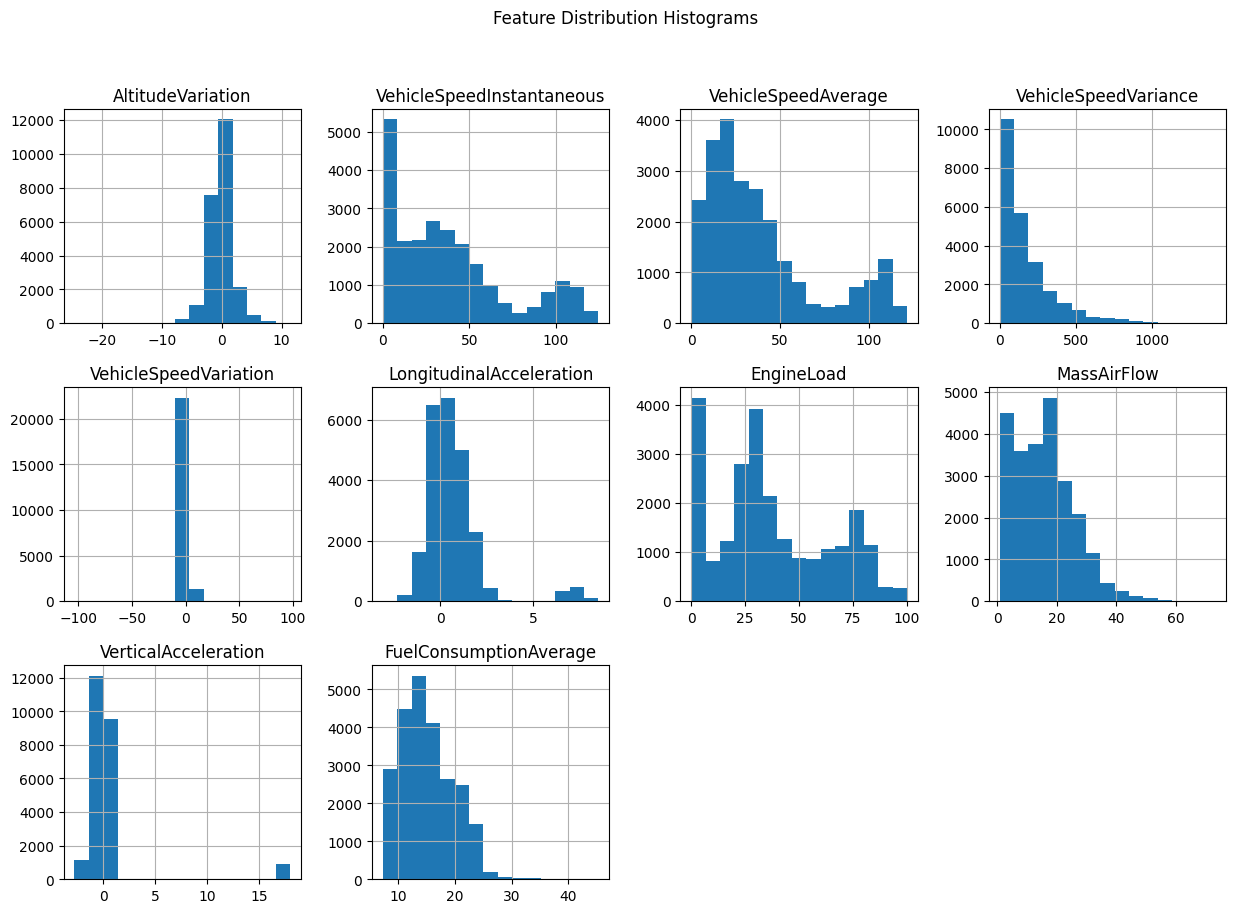

In [27]:
#Distribution Histogram

# Plot histograms for each numerical feature
df_combined[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Feature Distribution Histograms')
plt.show()


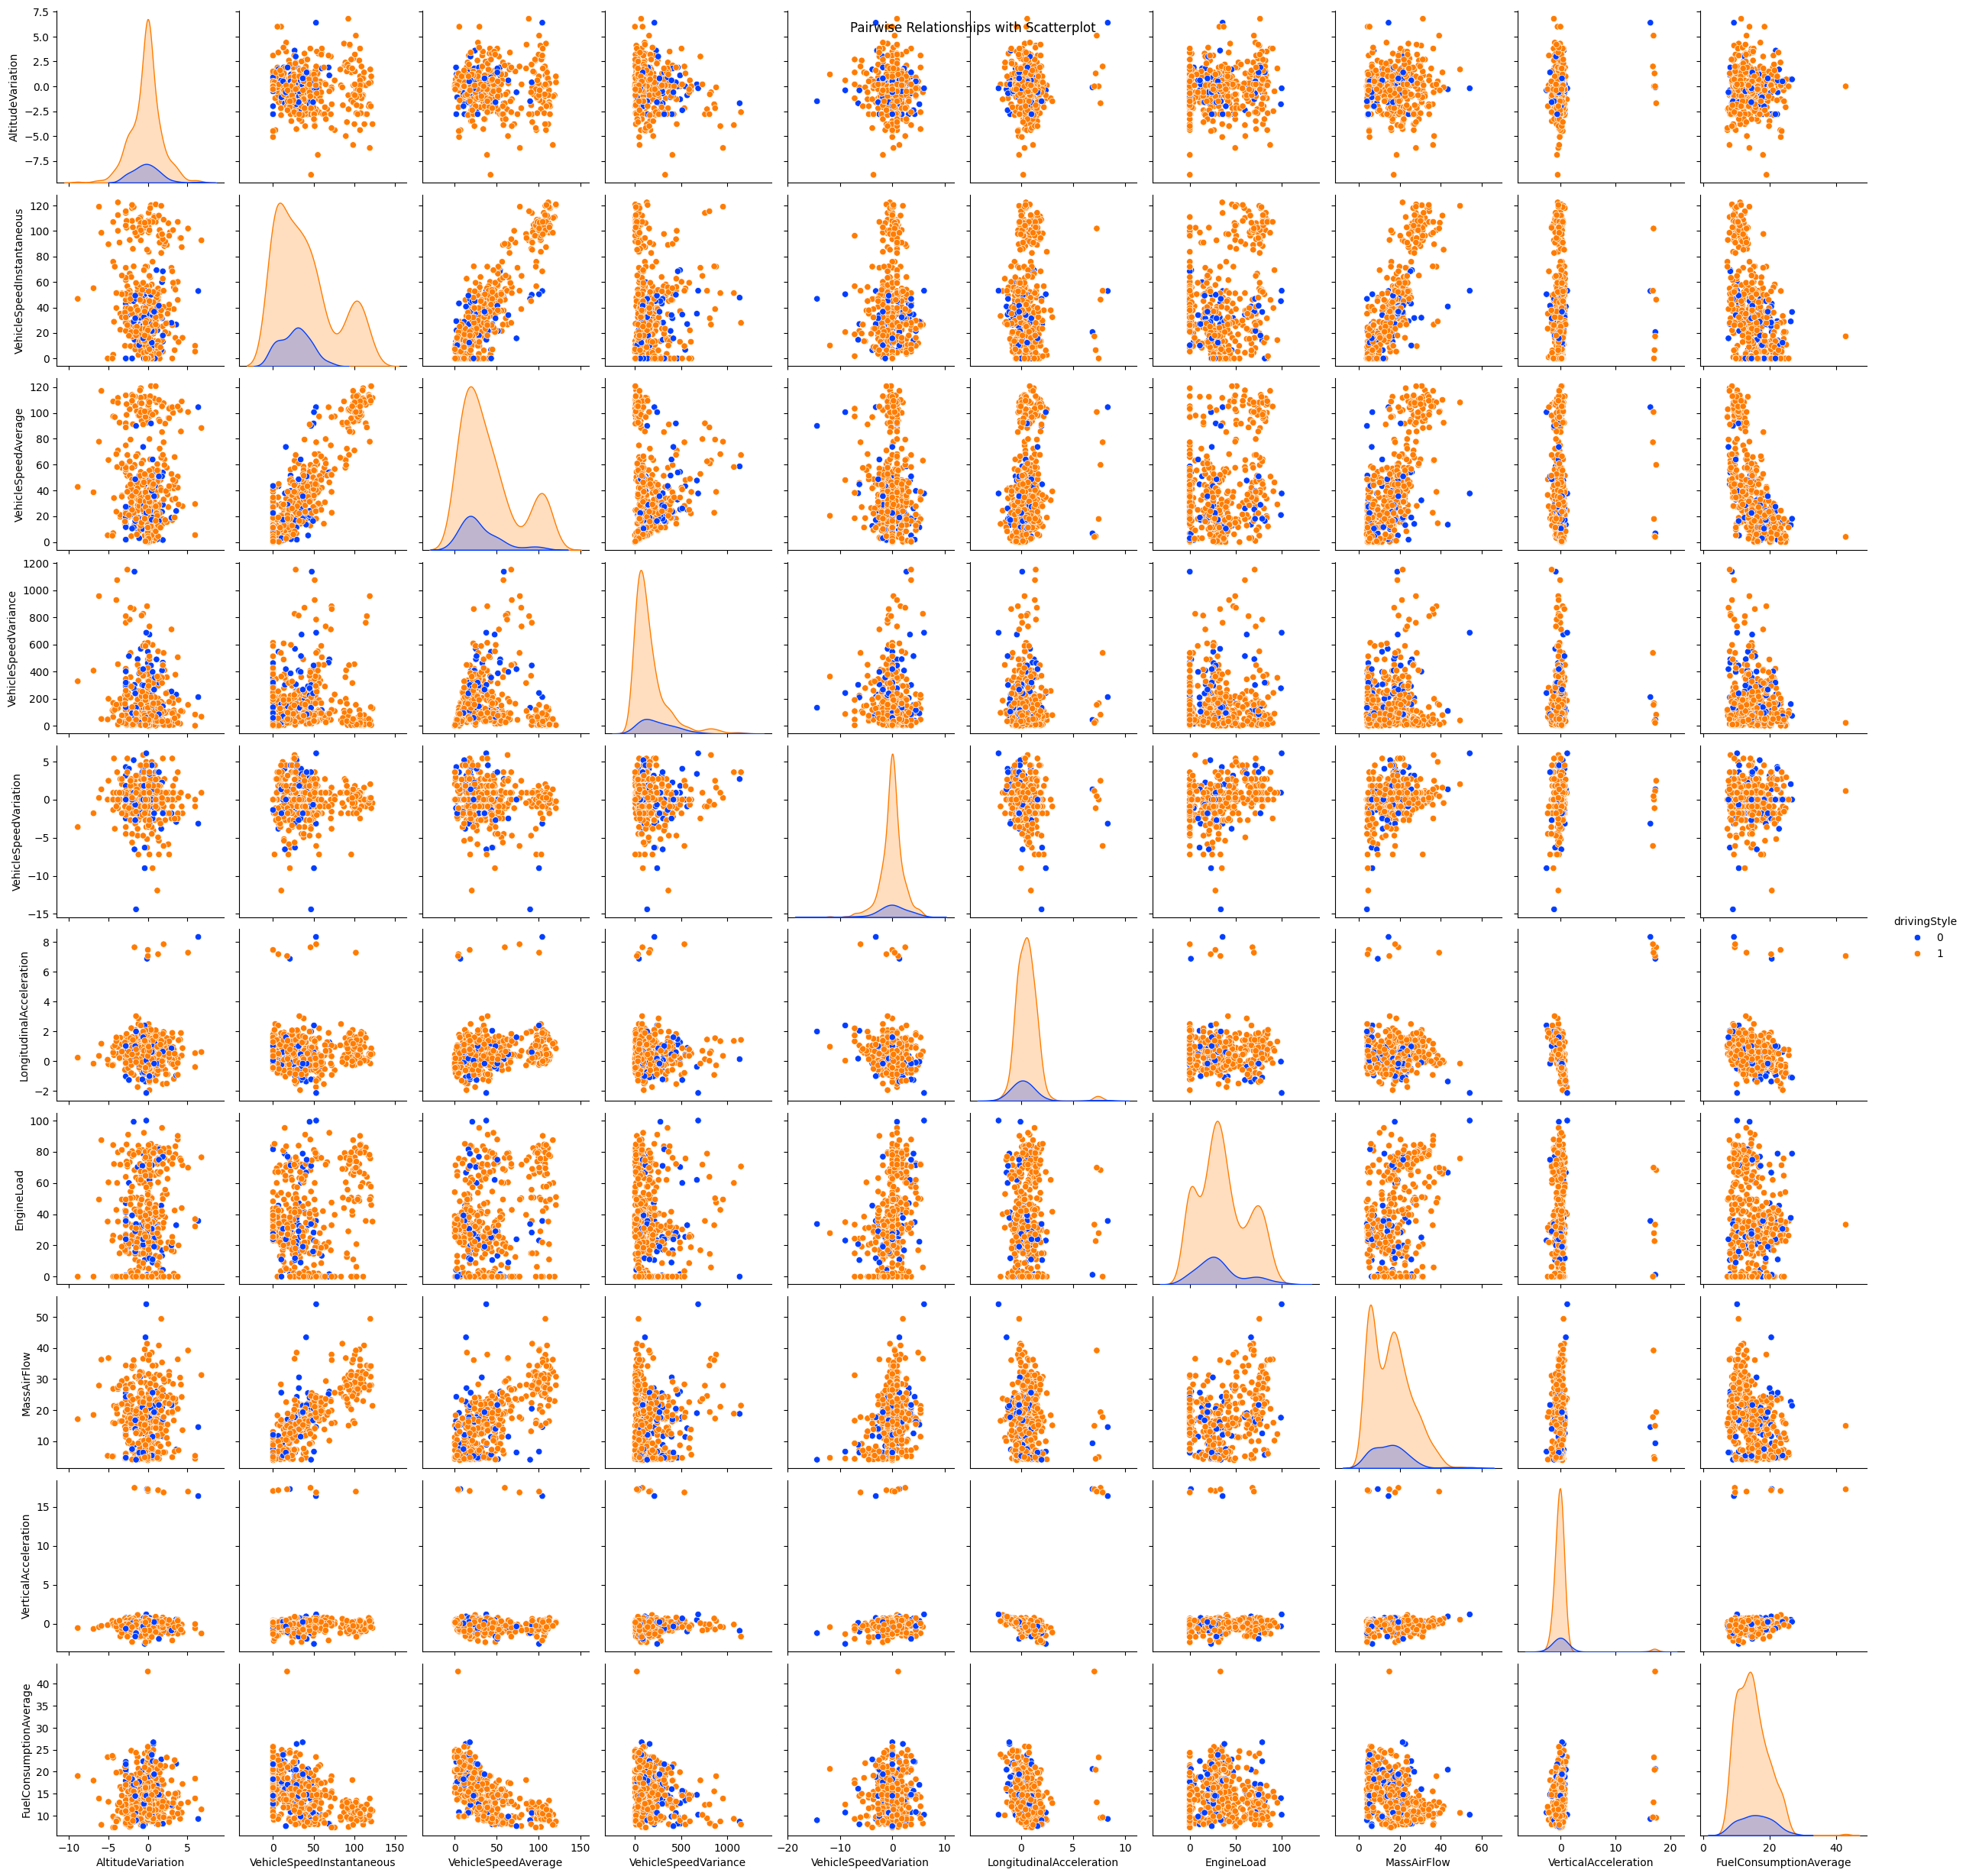

In [29]:
#Pairwise ScatetrPlot


# Wsample the combined dataframe to avoid memory issues
sns.pairplot(df_combined.sample(500), vars=numeric_cols, hue='drivingStyle', palette='bright')
plt.suptitle('Pairwise Relationships with Scatterplot')
plt.show()



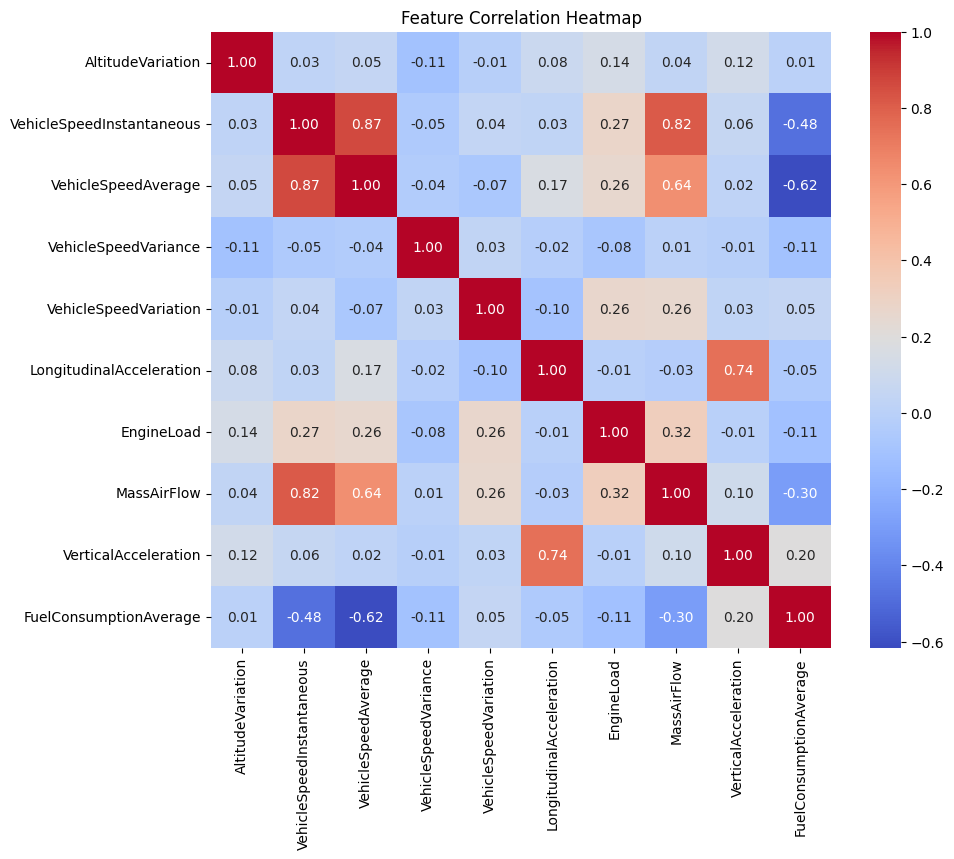

In [31]:
# Correlation Heatmap

# Calculate correlations
corr = df_combined[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\spann\AppData\Local\Temp\ipykernel_24048\1959477120.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())


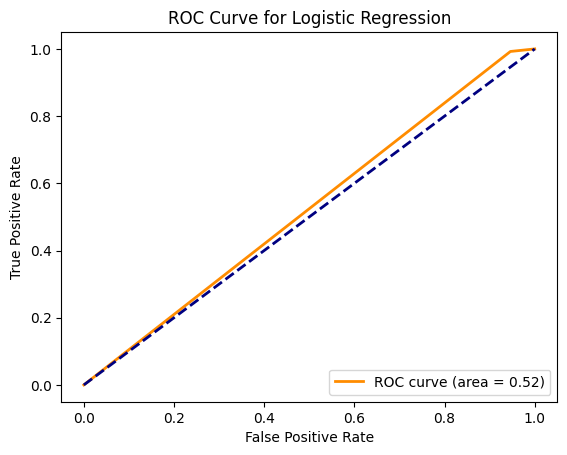

In [33]:
y_bin = label_binarize(y, classes=[0, 1]) # Adjust classes accordingly
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class and model
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute micro-average ROC curve and ROC area for logistic regression
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for logistic regression
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()